Import modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature

Open dataset and lat/lons

In [48]:
nc = Dataset('hgt.201411.nc')

lats = nc.variables['lat'][:]
lons = nc.variables['lon'][:]

Loop through dataset and generate filled contour

IndexError: index exceeds dimension bounds

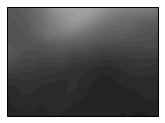

In [49]:
#plot projection
mapcrs = ccrs.LambertConformal(central_longitude=-100, central_latitude=35, standard_parallels=(30, 60))

#data projection
datacrs = ccrs.PlateCarree()

#figure properties
fig = plt.figure(1, figsize=(4, 2))
ax = plt.subplot(111, projection=mapcrs)
ax.set_extent([-125, -72, 20, 55], datacrs)

#statelines, coastlines
#ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
#ax.add_feature(cfeature.STATES.with_scale('50m'))

i=1
j=1
while j<32:
    #while loop for generating/saving plots
    hgt = nc.variables['hgt'][i,17,:,:]

    #mask for eliminating lines that wrap around globe
    mask = (lons > 179) | (lons < -179) | (lats > 89)
    maskedhgt = np.ma.array(hgt, mask=mask)

    #500mb filled contours
    clevs_500_hght = np.arange(5000,7000,50)
    cs = ax.contourf(lons, lats, maskedhgt, clevs_500_hght, cmap='binary', transform=datacrs)

    #save figure
    plt.savefig('201411_' + str(j) + '.png', bbox_inches="tight", pad_inches=0)

    j+=1
    i+=8